In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor





In [18]:
df=pd.read_csv('stud.csv')





In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
x=df.drop(columns=['math_score'],axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [21]:
print("categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())
print("categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())
print("categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:  ['female' 'male']
categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:  ['none' 'completed']


In [22]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [30]:
# create coulumn transformer with 3 types of transformers
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [("OneHotEncoder",oh_transformer,cat_features),
     ("StandardScaler",numeric_transformer,num_features)]
)

In [31]:
x=preprocessor.fit_transform(x)
x.shape

(1000, 19)

In [32]:
#dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [35]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [ ]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)#train model
    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    #evaluate train and test dataset
model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
print(list(models.keys())[i])
model_list.append(list(models.keys())[i])
print('model performance for training set')
print("- root mean squared error:{:.4f}".format(model_train_rmse))
print("- mean absolute error:{:.4f}".format(model_train_mae))
print("- r2 score:{:.4f}".format(model_train_r2))
print('---------------------------------------')
print('model performance for testing set')
print("- root mean squared error:{:.4f}".format(model_test_rmse))   
print("- mean absolute error:{:.4f}".format(model_test_mae))
print("- r2 score:{:.4f}".format(model_test_r2))
r2_list.append(model_test_r2)
print('='*35)
print('\n')

AdaBoostRegressor
model performance for training set
- root mean squared error:5.8435
- mean absolute error:4.7848
- r2 score:0.8485
---------------------------------------
model performance for testing set
- root mean squared error:6.0554
- mean absolute error:4.7843
- r2 score:0.8493




In [47]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_score']).sort_values(by='R2_score',ascending=False)

,Model name,R2_score
0,AdaBoostRegressor,0.849315


In [48]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_Pred=lin_model.predict(x_test)
score=r2_score(y_test,y_Pred)*100
print("accuracy of model is %.2f" %score)

accuracy of model is 88.04


Text(0, 0.5, 'Predicted values')

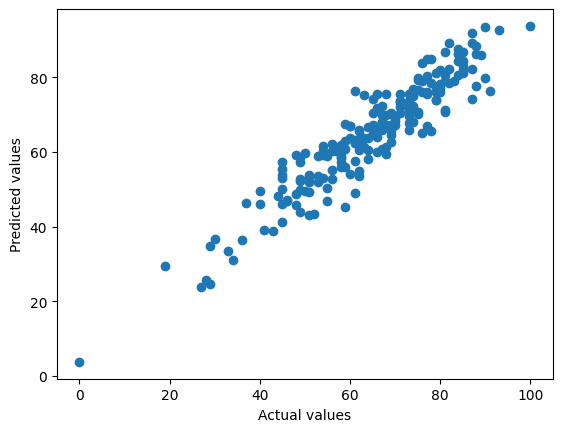

In [50]:
plt.scatter(y_test,y_Pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

<Axes: xlabel='math_score'>

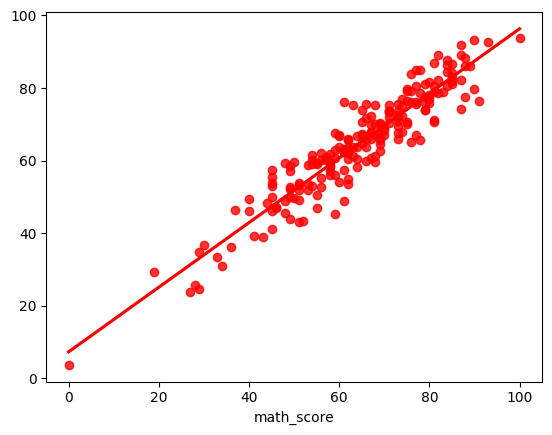

In [51]:
sns.regplot(x=y_test,y=y_Pred,ci=None,color='red')

In [52]:
pred_df=pd.DataFrame({'Actual values':y_test,'Predicted values':y_Pred,'Diffrence':y_test-y_Pred})
pred_df

,Actual values,Predicted values,Diffrence
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
